In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

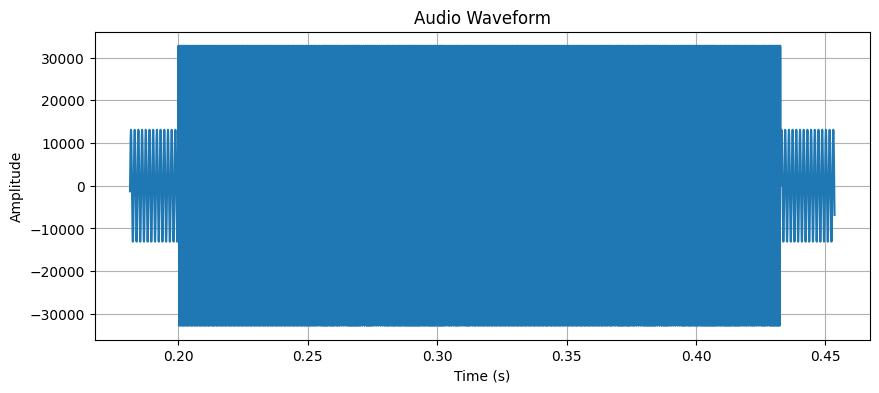

In [58]:
# Replace 'your_audio.wav' with the actual path to your WAV file
spf = wave.open('out.wav', 'r')
# spf = wave.open('out2.wav', 'r')

# Get the number of frames and sample rate
nframes = spf.getnframes()
framerate = spf.getframerate()

# Read all frames from the WAV file
signal_raw = spf.readframes(nframes)

# Convert raw audio data to a NumPy array
# The 'sampwidth' parameter determines the data type (e.g., 2 for 16-bit, 4 for 32-bit)
# Use np.frombuffer for efficiency
signal = np.frombuffer(signal_raw, dtype=np.int16) # Assuming 16-bit audio

# Create a time array in seconds
time = np.linspace(0, nframes / framerate, num=nframes)

start, stop = 8000, 20000
# start, stop = 182500, 183500
# start, stop = 182000, 195000
# start, stop = 0, -1

time = time[start:stop]
signal = signal[start:stop]

plt.figure(figsize=(10, 4)) # Adjust figure size as needed
plt.plot(time, signal)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Close the WAV file object
spf.close()

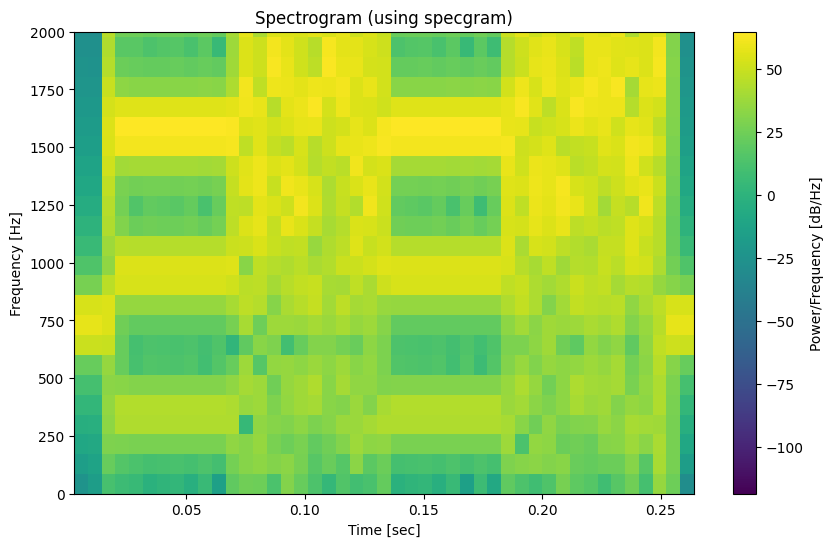

In [59]:
fs = 44100
plt.figure(figsize=(10, 6))
plt.specgram(signal, Fs=fs, NFFT=512, noverlap=256, cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram (using specgram)')
plt.colorbar(label='Power/Frequency [dB/Hz]')
# plt.ylim([0, fs / 2])
plt.ylim([0, 2000])
plt.show()